# Flight Price Prediction

Problem Statement:

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the train dataset.
df=pd.read_excel('Flight_Data_Train.xlsx')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
#cheking shape of the dataset
df.shape

(10683, 11)

We have 10,683 rows and 11 columns in our train dataset.

In [5]:
#cheking column names
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

Independent variables:
   
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Target variable:

Price: The price of the ticket.

 

In [6]:
#Checking data type
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

All the independent variables are of object typer and target variable is of integer type.

In [7]:
#Checking null values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

There is only 1 null value in route and total stops each, we will be dropping these rows.

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(10682, 11)

Only 1 single row was having  null value and it is removed.

In [10]:
#Checking duplicate entries
df[df.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [11]:
#Removing duplicate rows (keeping the first one)
df.drop_duplicates(keep='first',inplace=True)

In [12]:
df.shape

(10462, 11)

Now we have 10462 rows and 11 columns.

Extracting more features from the existing columns:

In [13]:
#Extracting day, month and year from Date of journey
df['Journey_Day'],df['Journey_Month'],df['Journey_Year']=df['Date_of_Journey'].str.split('/',3).str

In [14]:
#Separating hours and minutes from departure time and making#Separating hours and minutes from departure time and make individual columns  individual columns 
df['Dep_Hr'],df['Dep_Min']=df['Dep_Time'].str.split(':',2).str

In [15]:
#Removing date from arrival time
df['Arrival_Time'],_=df['Arrival_Time'].str.split(' ',1).str

In [16]:
df['Arrival_Time']

0        01:10
1        13:15
2        04:25
3        23:30
4        21:35
         ...  
10678    22:25
10679    23:20
10680    11:20
10681    14:10
10682    19:15
Name: Arrival_Time, Length: 10462, dtype: object

In [17]:
#Separating hours and minutes from arrival time and making individual columns
df['Arrival_Hr'],df['Arrival_Min']=df['Arrival_Time'].str.split(':',2).str

In [18]:
#Replacing 'h' in duration with ':' and 'm' with blank space
df['Duration']=df['Duration'].str.replace('h ',':').str.replace('h',':').str.replace('m','')

In [19]:
#Separating hours and minutes from duration and making individual columns
df['Duration_Hr'],df['Duration_Min']= df['Duration'].str.split(':',2).str

In [20]:
#Checking unique values in total stops
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [21]:
#Keeping only the numeric value in stops columns and placing 0 for non stop flights.
df["Total_Stops"]=df["Total_Stops"].replace({'non-stop':0,'2 stops':2,'1 stop':1,'3 stops':3,'4 stops':4})

In [22]:
df['Total_Stops'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [23]:
#Checking additional info column
df['Additional_Info'].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

As we don't have any info for the majority of entries, therefore we will be drooping the column. 

Dropping date of journey, dep_time, arrival_time and duration column as ew have extracted the information from these columns and have made new columns from them.

Route column indicates the number of stops, which we already have in the total stops column therfore we will be removing the route column as well.

In [24]:
df.drop(columns=['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration','Additional_Info'],axis=1,inplace=True)

In [25]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Journey_Day', 'Journey_Month', 'Journey_Year', 'Dep_Hr', 'Dep_Min',
       'Arrival_Hr', 'Arrival_Min', 'Duration_Hr', 'Duration_Min'],
      dtype='object')

In [26]:
df.dtypes

Airline          object
Source           object
Destination      object
Total_Stops       int64
Price             int64
Journey_Day      object
Journey_Month    object
Journey_Year     object
Dep_Hr           object
Dep_Min          object
Arrival_Hr       object
Arrival_Min      object
Duration_Hr      object
Duration_Min     object
dtype: object

In [27]:
#Converting the newly created columns to integer
new_col=['Journey_Day','Journey_Month','Journey_Year','Dep_Hr','Dep_Min','Arrival_Hr','Arrival_Min','Duration_Hr','Duration_Min']
for i in new_col:
    df[i]=pd.to_numeric(df[i],errors='coerce')

In [28]:
df.dtypes

Airline           object
Source            object
Destination       object
Total_Stops        int64
Price              int64
Journey_Day        int64
Journey_Month      int64
Journey_Year       int64
Dep_Hr             int64
Dep_Min            int64
Arrival_Hr         int64
Arrival_Min        int64
Duration_Hr        int64
Duration_Min     float64
dtype: object

In [29]:
#Checking for null values as in duration some rows only contained hours therfore in those rows null values would be created by the data type conversion code used above. 
df.isnull().sum()

Airline             0
Source              0
Destination         0
Total_Stops         0
Price               0
Journey_Day         0
Journey_Month       0
Journey_Year        0
Dep_Hr              0
Dep_Min             0
Arrival_Hr          0
Arrival_Min         0
Duration_Hr         0
Duration_Min     1006
dtype: int64

In [30]:
#Replacing the null values with 0
df['Duration_Min'].fillna(0,inplace=True)

In [31]:
df.isnull().sum()

Airline          0
Source           0
Destination      0
Total_Stops      0
Price            0
Journey_Day      0
Journey_Month    0
Journey_Year     0
Dep_Hr           0
Dep_Min          0
Arrival_Hr       0
Arrival_Min      0
Duration_Hr      0
Duration_Min     0
dtype: int64

# Visualization:

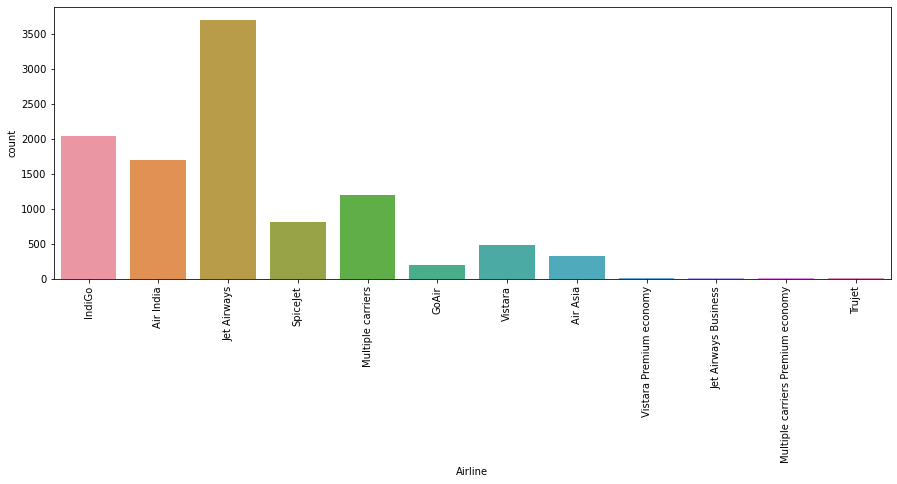

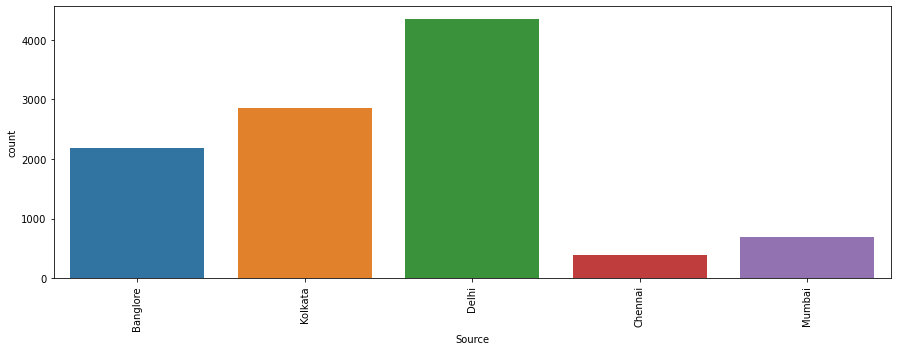

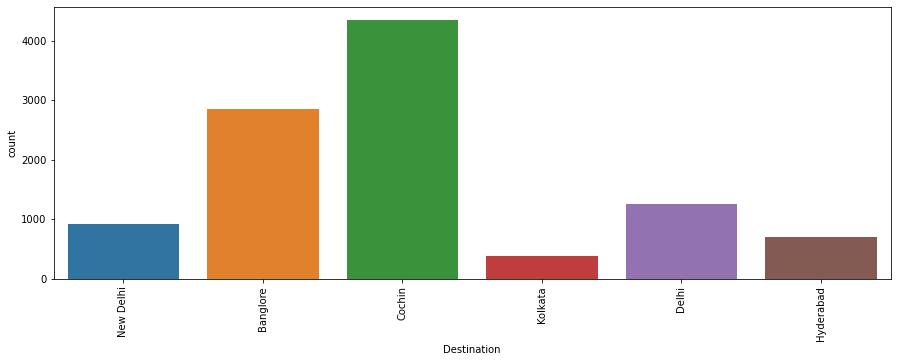

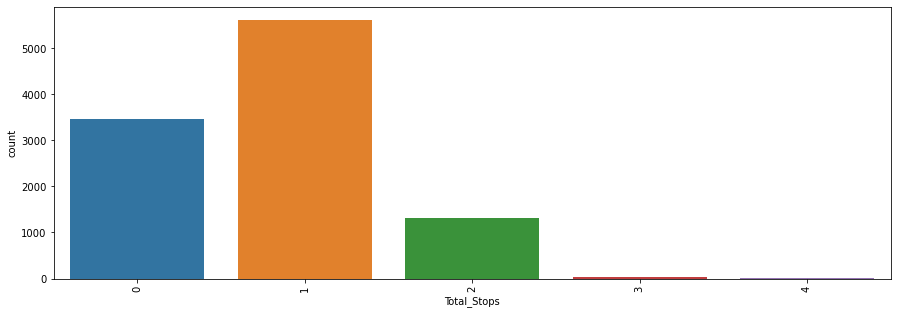

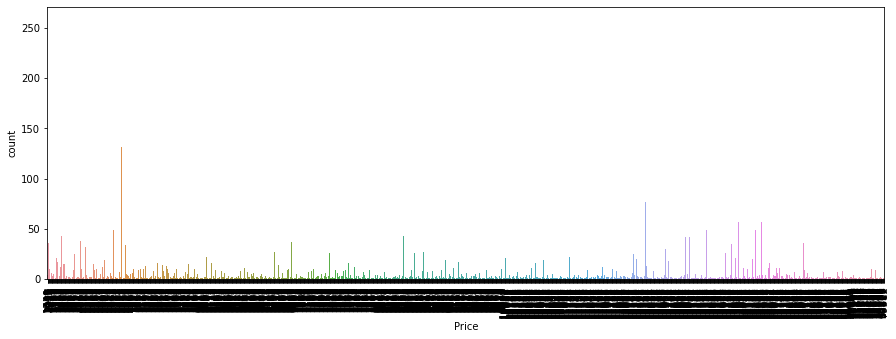

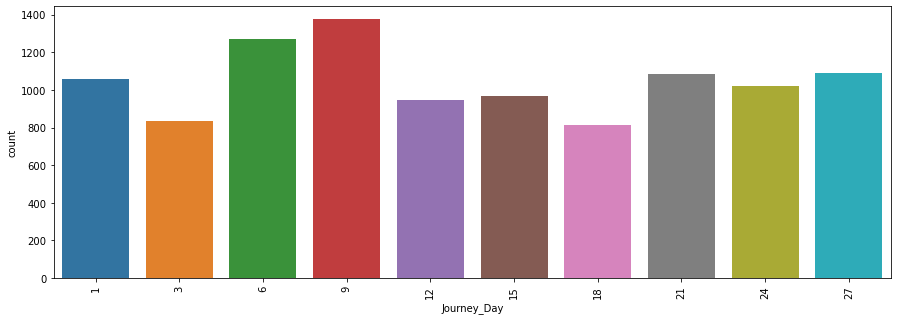

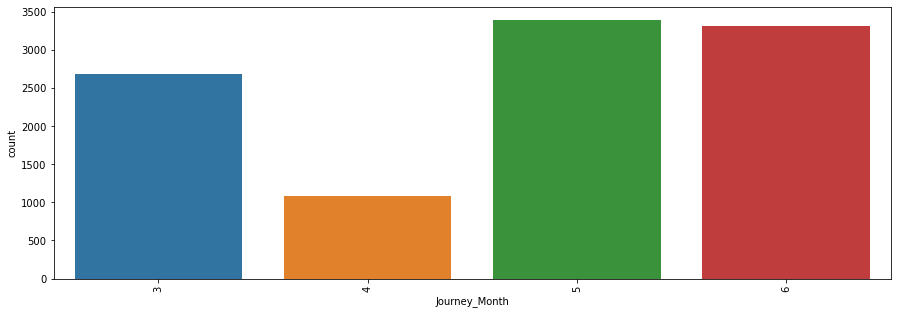

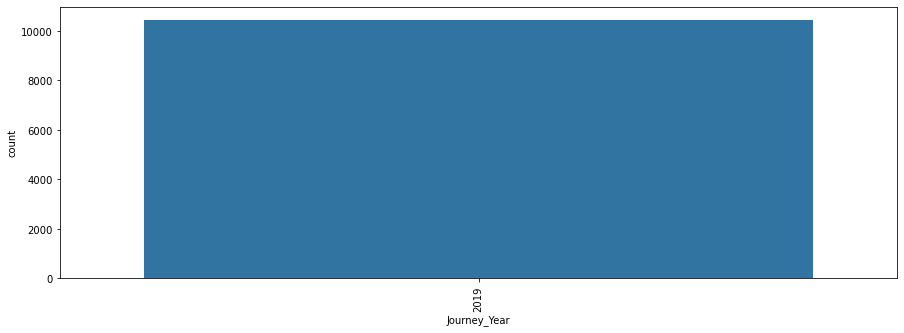

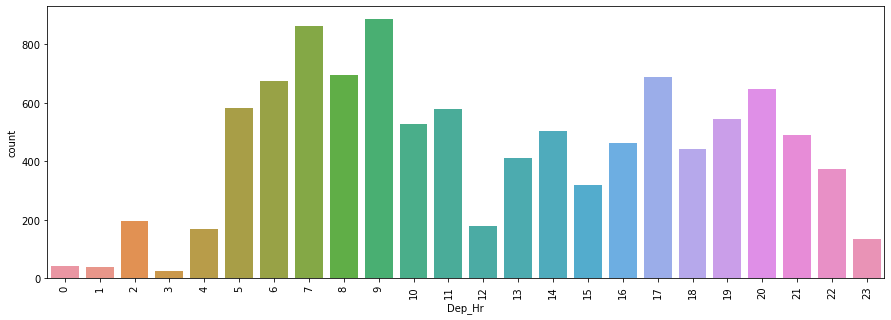

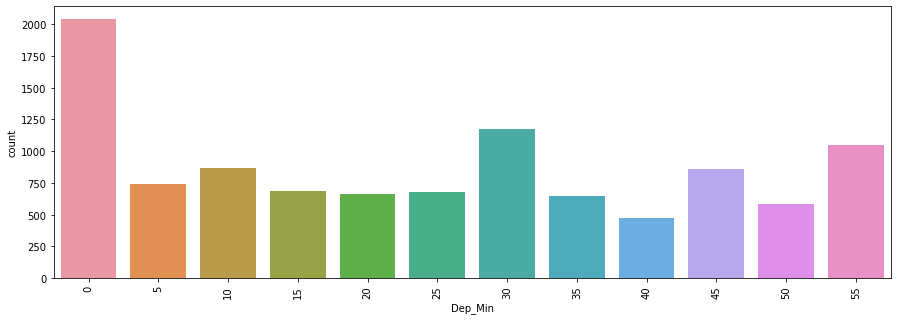

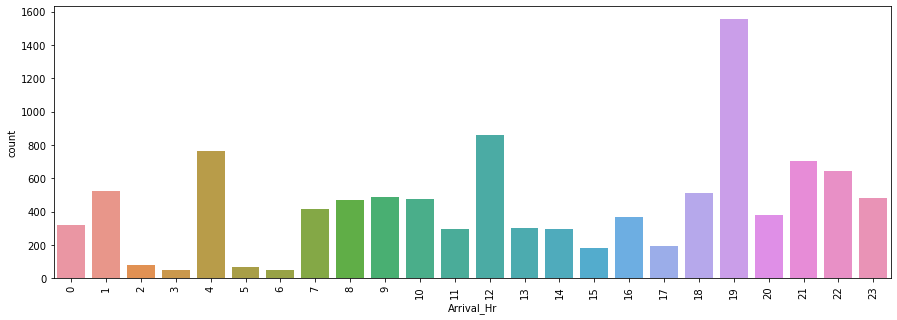

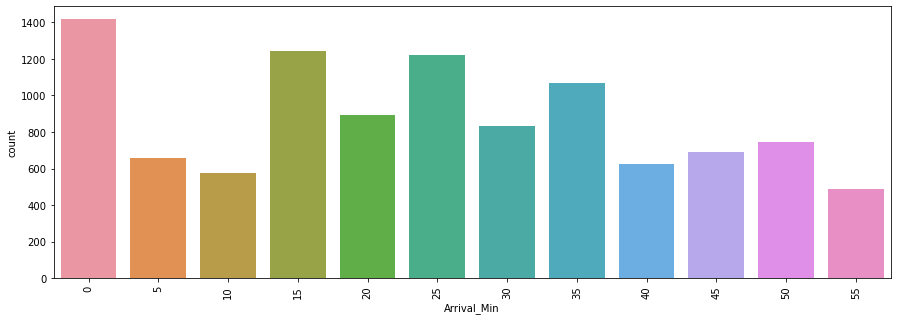

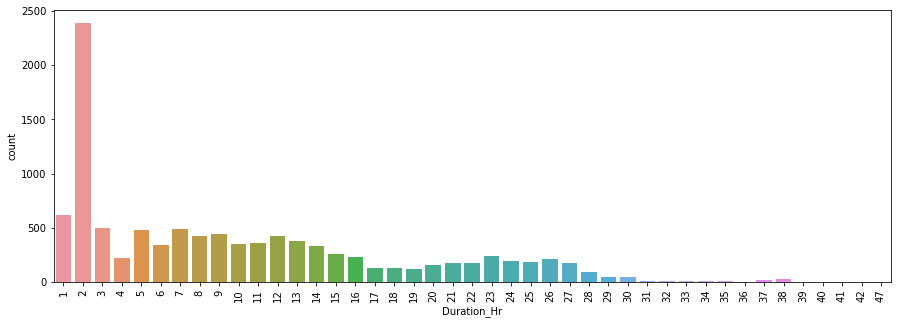

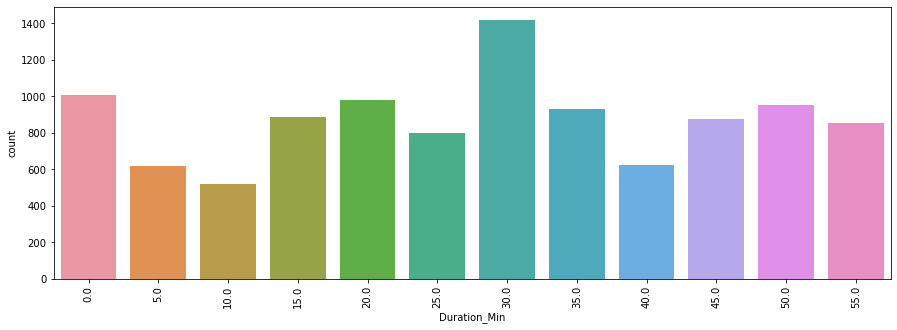

In [32]:
for i in df.columns:
    plt.figure(figsize=(15,5))
    sns.countplot(df[i])
    plt.xticks(rotation=90)
    plt.show()

Observations:
   
Jetairways have the maximum number of flights in our dataset.

Source of majority of flights is Delhi.

Destination of majority of flights is Cochin followed by Banglore.

Maximum number of flights have 1 stopage.

Maximum journeys are done on 9th day of the month.

Majority of flights fly in 5th month of the year.

Our data set have data of the year 2019.

Majority  flights departs at 9 in the morning.

Arrival time for majority of flights is 19 in the evening.

Duration of most of the flights is between 2-3 hrs.


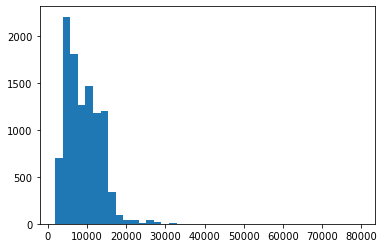

In [33]:
plt.hist(df['Price'],bins=40)
plt.show()

Flight price data is skewed and extreme values are present in the target variable.

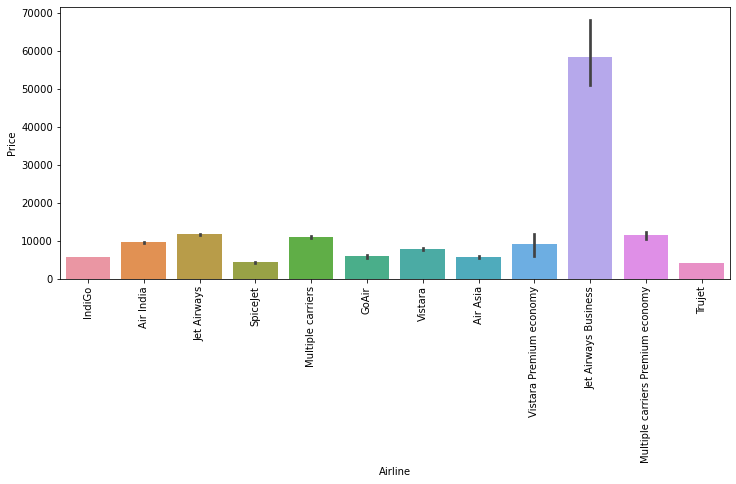

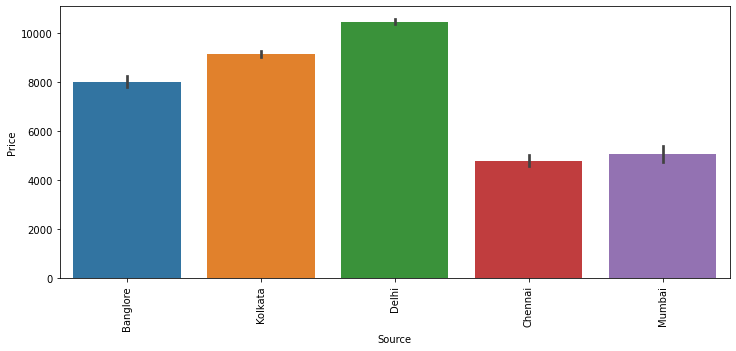

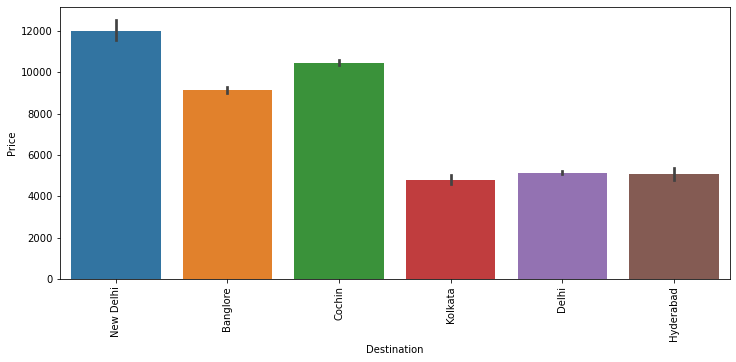

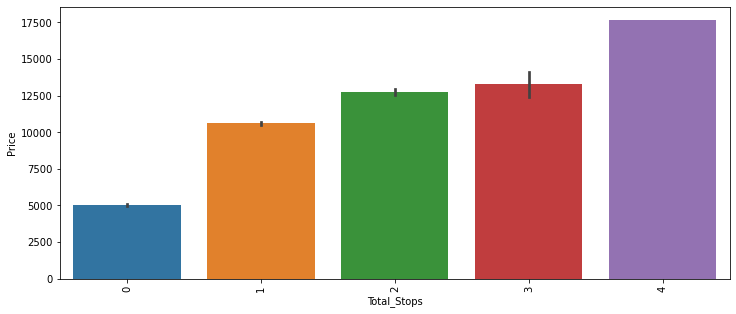

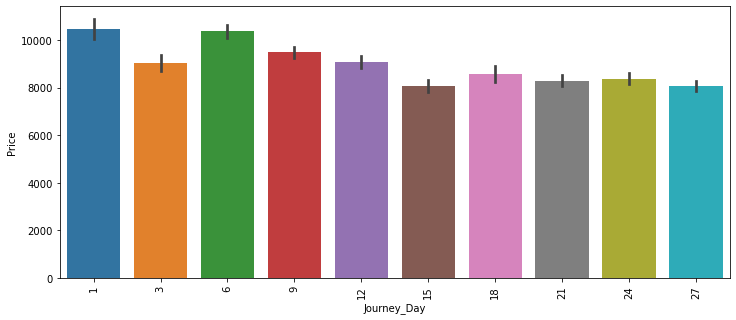

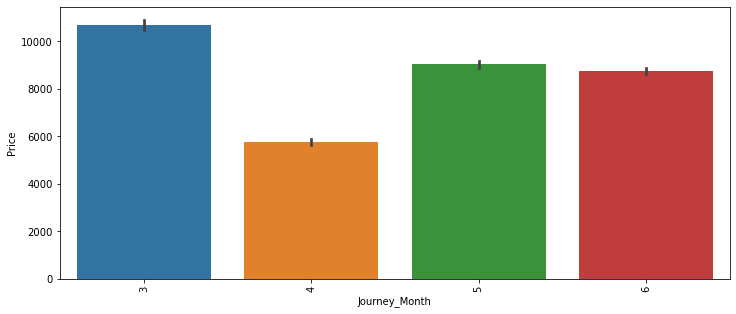

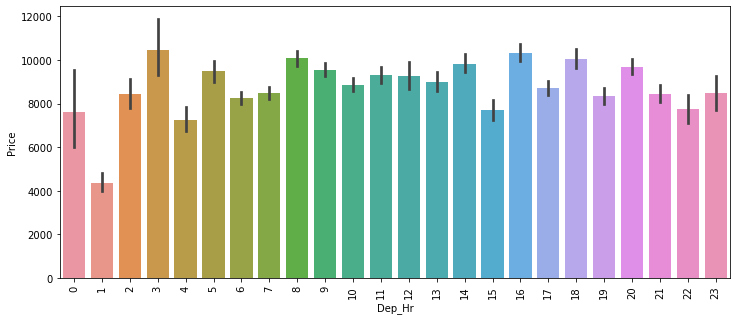

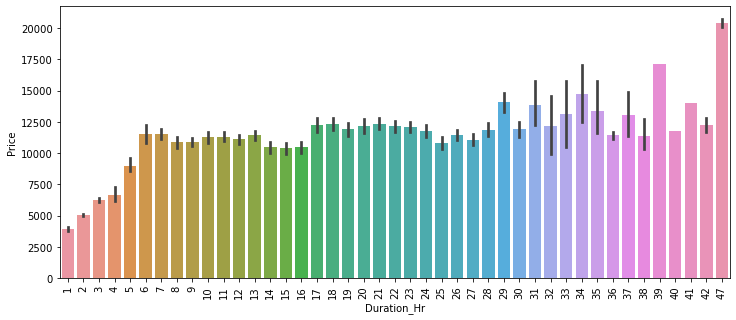

In [34]:
col=['Airline','Source','Destination','Total_Stops','Journey_Day', 'Journey_Month','Dep_Hr','Duration_Hr']

for i in col:
    plt.figure(figsize=(12,5))
    sns.barplot(df[i], df['Price'])
    plt.xticks(rotation=90)
    plt.show()

Observations:

Jet Airways Business is the most expensive airline and Trujet is the cheapest.

Flight rates are higher whose source is Delhi.

Flight rates are high for flights having destination New Delhi.

Flights are expensive if you have more number of stops.

On 1st day of the month the flight rates are high and low on 15th and 27th day of month.

Flight rates are high in the 3rd month and low in 4th month.

Flight rates are low for those which departs at 1am.

Flight rates increases with increase in duration time of the journey.



In [35]:
df.describe()

,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Hr,Dep_Min,Arrival_Hr,Arrival_Min,Duration_Hr,Duration_Min
count,10462.000000,10462.000000,10462.000000,10462.000000,10462.0,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000
mean,0.802332,9026.790289,13.463200,4.701491,2019.0,12.478494,24.404989,13.387689,24.719939,10.026668,28.209711
std,0.660609,4624.849541,8.467493,1.163802,0.0,5.727227,18.815719,6.855547,16.570450,8.377593,16.879913
min,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,5224.000000,6.000000,3.000000,2019.0,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,1.000000,8266.000000,12.000000,5.000000,2019.0,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,1.000000,12344.750000,21.000000,6.000000,2019.0,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,4.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


The minimum price of a flight is 1759 and maximum is 79512.

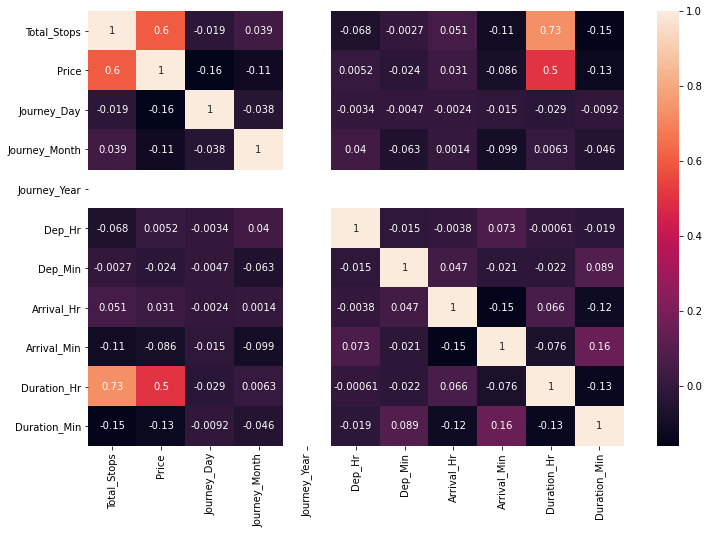

In [36]:
#Checking correlation
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

Observations:

Price and total stops are have strong correlation.

price and duration hr are positively correlated.

Total stops and duration hr are stongly correlated as the duration hours will increase with the increase in total stops.


We will not be checking for outliers as all the independent variables are categorical type.

In [37]:
#Converting object data type columns to numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    if df[i].dtypes==object:
        df[i] = le.fit_transform(df[i])

In [38]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Hr,Dep_Min,Arrival_Hr,Arrival_Min,Duration_Hr,Duration_Min
0,3,0,5,0,3897,24,3,2019,22,20,1,10,2,50.0
1,1,3,0,2,7662,1,5,2019,5,50,13,15,7,25.0
2,4,2,1,2,13882,9,6,2019,9,25,4,25,19,0.0
3,3,3,0,1,6218,12,5,2019,18,5,23,30,5,25.0
4,3,0,5,1,13302,1,3,2019,16,50,21,35,4,45.0


In [39]:
#Removing Journey year as it's same for all the rows (we have data only from 2019)
df.drop(columns='Journey_Year',axis=1,inplace=True)

In [40]:
df.shape

(10462, 13)

Now we have 10462 rows and 13 columns.

In [41]:
#Separating independent variables and target variable
x=df.drop(['Price'],axis=1)
y=df['Price']

In [42]:
x.shape,y.shape

((10462, 12), (10462,))

# Finding the best random state:

In [43]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
lr=LinearRegression()
ls=Lasso()
rd=Ridge()


In [44]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print('At random state',i,'Training accuracy is:', r2_score(y_train,pred_train))
    print('At random state',i,'Testing accuracy is:',r2_score(y_test,pred_test))
    print('\n')

At random state 0 Training accuracy is: 0.4296725064921679
At random state 0 Testing accuracy is: 0.45741055558989274


At random state 1 Training accuracy is: 0.43328147634958303
At random state 1 Testing accuracy is: 0.44325716557405537


At random state 2 Training accuracy is: 0.4577765669367396
At random state 2 Testing accuracy is: 0.3611419574926169


At random state 3 Training accuracy is: 0.43029834528144406
At random state 3 Testing accuracy is: 0.45801464657633006


At random state 4 Training accuracy is: 0.43768338412436725
At random state 4 Testing accuracy is: 0.4254168042921721


At random state 5 Training accuracy is: 0.4299967960701534
At random state 5 Testing accuracy is: 0.45721334464785457


At random state 6 Training accuracy is: 0.4374092692591095
At random state 6 Testing accuracy is: 0.4246170617088666


At random state 7 Training accuracy is: 0.43088413808381953
At random state 7 Testing accuracy is: 0.4509925103989947


At random state 8 Training accuracy is: 

In [45]:
#Doing train test split at random state 75 as we got best result on it.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=75)

In [46]:
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
print('Training accuracy is:', r2_score(y_train,pred_train))
print('Testing accuracy is:',r2_score(y_test,pred_test))
print('mean absolute error:',mean_absolute_error(y_test,pred_test))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,pred_test)))

Training accuracy is: 0.4259301762230693
Testing accuracy is: 0.47477696334024533
mean absolute error: 2396.0890965555577
Root mean squared error: 3264.805684080354


We are getting low accuracy and RMSE is high. Lets try removing skewness from the price column and check the results.

In [47]:
#Checkinh skewness of target variable
y.skew()

1.8574899082173875

In [48]:
#Removing skewness using log transformation (keeping +/- 0.5 as the range for skewness)
y=np.log1p(y)

In [49]:
y.skew()

-0.22810645508629535

In [50]:
#Let try to find the best random state with the new 'y'.
lr=LinearRegression()
maxr2=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    predrf=lr.predict(x_test)
    r2=r2_score(y_test,predrf)
    if r2>maxr2:
        maxr2=r2
        maxrs=i
print('Best r2_score is',maxr2,'on random state', maxrs)

Best r2_score is 0.5837766067032991 on random state 90


R2_score have improved from the previous one.

In [51]:
#Doing train test split at random state 90 as we got best result on it.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=90)

In [52]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8369, 12), (2093, 12), (8369,), (2093,))

In [53]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score

In [54]:
ls=Lasso()
rd=Ridge()
svr=SVR()
knn=KNeighborsRegressor()
rf=RandomForestRegressor()
ada=AdaBoostRegressor()

In [55]:
#Training different models
model=[lr,ls,rd,svr,knn,rf,ada]

for i in model:
    print('\n')
    print(i)
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    score=i.score(x_train,y_train)
    print('score:',score)
    print('mean absolute error:',mean_absolute_error(y_test,pred))
    print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,pred)))
    print('r2_score:',r2_score(y_test,pred))
    scores=cross_val_score(i, x, y, cv=5)
    print('Cross Validation Score:',scores.mean())



LinearRegression()
score: 0.5373208485442913
mean absolute error: 0.27225132536084884
Root mean squared error: 0.34116148524948164
r2_score: 0.5837766067032991
Cross Validation Score: 0.5456787239364245


Lasso()
score: 0.28906572203676717
mean absolute error: 0.3512915647841734
Root mean squared error: 0.43910631739671324
r2_score: 0.31048159472622316
Cross Validation Score: 0.2985330976469037


Ridge()
score: 0.5373207886057019
mean absolute error: 0.27224634333479764
Root mean squared error: 0.34115878882732653
r2_score: 0.5837831860482281
Cross Validation Score: 0.5456787061304889


SVR()
score: 0.6728468704076351
mean absolute error: 0.2205823593788584
Root mean squared error: 0.29054300678064965
r2_score: 0.6981248624782175
Cross Validation Score: 0.6664482757026103


KNeighborsRegressor()
score: 0.8285325292390934
mean absolute error: 0.18484284526626163
Root mean squared error: 0.2576863157422176
r2_score: 0.7625406880262411
Cross Validation Score: 0.7322700825261768


Random

The best model performing is Random forest with r2 score of 87%, cross validation score of 86%, MAE- 0.12 and RMSE- 0.18.

# Hyper Parameter tuning:

In [56]:
from sklearn.model_selection import GridSearchCV

parameters={'n_estimators':[int(x) for x in np.linspace(start=100,stop=800,num=12)],'max_features':['auto','sqrt']}
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'max_features': 'auto', 'n_estimators': 736}


In [57]:
rf=RandomForestRegressor(n_estimators=736,max_features='auto')
rf.fit(x_train,y_train)
pred_rf=rf.predict(x_test)
print('mean absolute error:',mean_absolute_error(y_test,pred_rf))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,pred_rf)))
print('R2 score is:',r2_score(y_test,pred_rf))
cv_score=cross_val_score(rf,x,y,cv=5)
cv_mean=cv_score.mean()
print('Cross Val Score is:',cv_mean)

mean absolute error: 0.12222431548802401
Root mean squared error: 0.1860352285058062
R2 score is: 0.876235276270734
Cross Val Score is: 0.8629229538771188


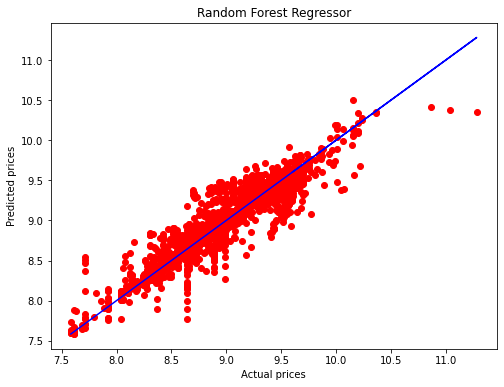

In [58]:
#ploting our model
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_rf, color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Random Forest Regressor')
plt.show()

we have our final model with r2 score of 87%, cross validation score of 86%, MAE- 0.12 and RMSE- 0.18. Our model shows a good fit.

In [59]:
#Saving our model
import joblib
joblib.dump(rf,'Flight_price_prediction_rf.obj')

['Flight_price_prediction_rf.obj']

In [60]:
#importing Test data
df_test=pd.read_excel('Flight_Test_set.xlsx')

In [62]:
#cheking shape of the dataset
df_test.shape

(2671, 10)

we have 2671 rows and 10 columns.

In [64]:
#cheking column names
df_test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [65]:
#Checking data type
df_test.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [66]:
#Checking null values
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

No null values.

In [67]:
#Checking duplicate entries
df_test[df_test.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
294,Jet Airways,12/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 13 Jun,22h 55m,2 stops,No info
794,Jet Airways,12/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 13 Jun,22h 55m,2 stops,In-flight meal not included
909,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,20:00,22:55,2h 55m,non-stop,No info
974,Air India,12/06/2019,Kolkata,Banglore,CCU → DEL → AMD → BLR,07:00,05:25 13 Jun,22h 25m,2 stops,No info
1011,Jet Airways,9/05/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 10 May,22h 55m,2 stops,No info
1033,Multiple carriers,15/05/2019,Delhi,Cochin,DEL → BOM → COK,07:30,19:15,11h 45m,1 stop,No info
1044,GoAir,24/03/2019,Banglore,New Delhi,BLR → DEL,20:55,23:50,2h 55m,non-stop,No info
1233,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,No info
1504,Air India,15/06/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 16 Jun,21h 15m,2 stops,No info
1537,Jet Airways,6/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,06:45,04:25 07 Jun,21h 40m,2 stops,In-flight meal not included


In [68]:
#Removing duplicate rows (keeping the first one)
df_test.drop_duplicates(keep='first',inplace=True)

In [69]:
#Extracting day, month and year from Date of journey
df_test['Journey_Day'],df_test['Journey_Month'],df_test['Journey_Year']=df_test['Date_of_Journey'].str.split('/',3).str

In [70]:
#Separating hours and minutes from departure time and making#Separating hours and minutes from departure time and make individual columns  individual columns 
df_test['Dep_Hr'],df_test['Dep_Min']=df_test['Dep_Time'].str.split(':',2).str

In [71]:
#Removing date from arrival time
df_test['Arrival_Time'],_=df_test['Arrival_Time'].str.split(' ',1).str

In [72]:
df_test['Arrival_Time']

0       04:25
1       10:20
2       19:00
3       21:00
4       02:45
        ...  
2666    20:25
2667    16:55
2668    04:25
2669    19:15
2670    19:15
Name: Arrival_Time, Length: 2645, dtype: object

In [73]:
#Separating hours and minutes from arrival time and making individual columns
df_test['Arrival_Hr'],df_test['Arrival_Min']=df_test['Arrival_Time'].str.split(':',2).str

In [74]:
#Replacing 'h' in duration with ':' and 'm' with blank space
df_test['Duration']=df_test['Duration'].str.replace('h ',':').str.replace('h',':').str.replace('m','')

In [75]:
#Separating hours and minutes from duration and making individual columns
df_test['Duration_Hr'],df_test['Duration_Min']= df_test['Duration'].str.split(':',2).str

In [76]:
#Checking unique values in total stops
df_test['Total_Stops'].unique()

array(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'],
      dtype=object)

In [77]:
#Keeping only the numeric value in stops columns and placing 0 for non stop flights.
df_test["Total_Stops"]=df_test["Total_Stops"].replace({'non-stop':0,'2 stops':2,'1 stop':1,'3 stops':3,'4 stops':4})

In [78]:
#Checking additional info column
df_test['Additional_Info'].value_counts()

No info                         2126
In-flight meal not included      440
No check-in baggage included      76
Change airports                    1
Business class                     1
1 Long layover                     1
Name: Additional_Info, dtype: int64

In [79]:
df_test.drop(columns=['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration','Additional_Info'],axis=1,inplace=True)

In [80]:
df_test.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Journey_Day',
       'Journey_Month', 'Journey_Year', 'Dep_Hr', 'Dep_Min', 'Arrival_Hr',
       'Arrival_Min', 'Duration_Hr', 'Duration_Min'],
      dtype='object')

In [81]:
df_test.dtypes

Airline          object
Source           object
Destination      object
Total_Stops       int64
Journey_Day      object
Journey_Month    object
Journey_Year     object
Dep_Hr           object
Dep_Min          object
Arrival_Hr       object
Arrival_Min      object
Duration_Hr      object
Duration_Min     object
dtype: object

In [82]:
#Converting the newly created columns to integer
new_col=['Journey_Day','Journey_Month','Journey_Year','Dep_Hr','Dep_Min','Arrival_Hr','Arrival_Min','Duration_Hr','Duration_Min']
for i in new_col:
    df_test[i]=pd.to_numeric(df_test[i],errors='coerce')

In [83]:
df_test.dtypes

Airline           object
Source            object
Destination       object
Total_Stops        int64
Journey_Day        int64
Journey_Month      int64
Journey_Year       int64
Dep_Hr             int64
Dep_Min            int64
Arrival_Hr         int64
Arrival_Min        int64
Duration_Hr        int64
Duration_Min     float64
dtype: object

In [84]:
#Checking for null values as in duration some rows only contained hours therfore in those rows null values would be created by the data type conversion code used above. 
df_test.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Journey_Day        0
Journey_Month      0
Journey_Year       0
Dep_Hr             0
Dep_Min            0
Arrival_Hr         0
Arrival_Min        0
Duration_Hr        0
Duration_Min     252
dtype: int64

In [85]:
#Replacing the null values with 0
df_test['Duration_Min'].fillna(0,inplace=True)

In [86]:
df_test.isnull().sum()

Airline          0
Source           0
Destination      0
Total_Stops      0
Journey_Day      0
Journey_Month    0
Journey_Year     0
Dep_Hr           0
Dep_Min          0
Arrival_Hr       0
Arrival_Min      0
Duration_Hr      0
Duration_Min     0
dtype: int64

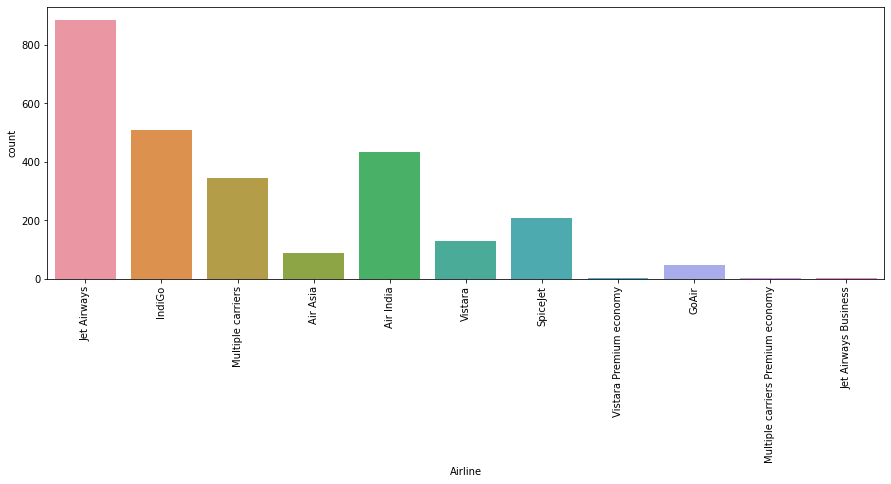

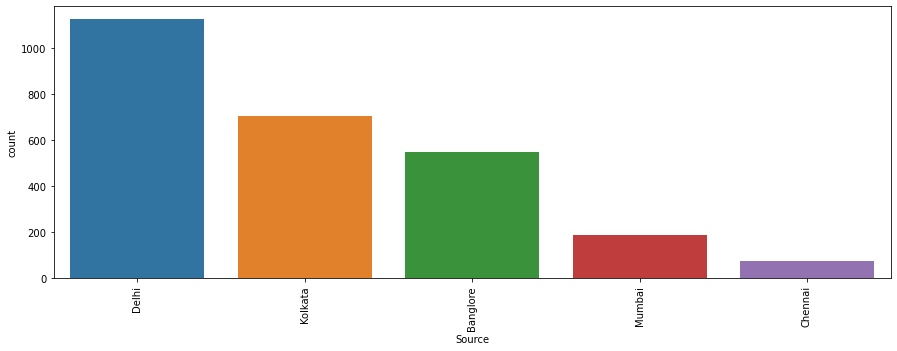

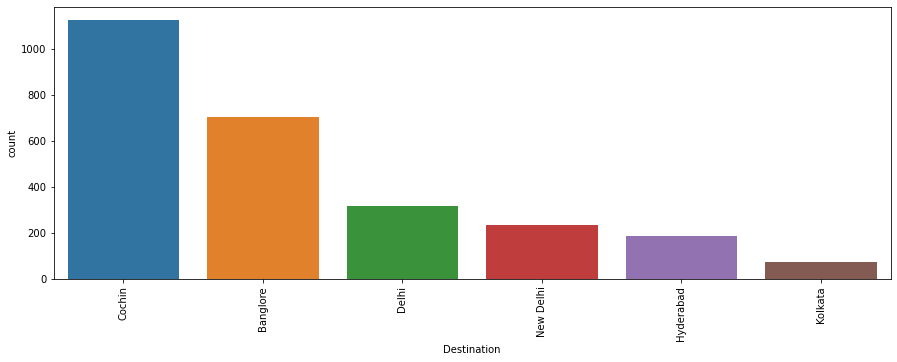

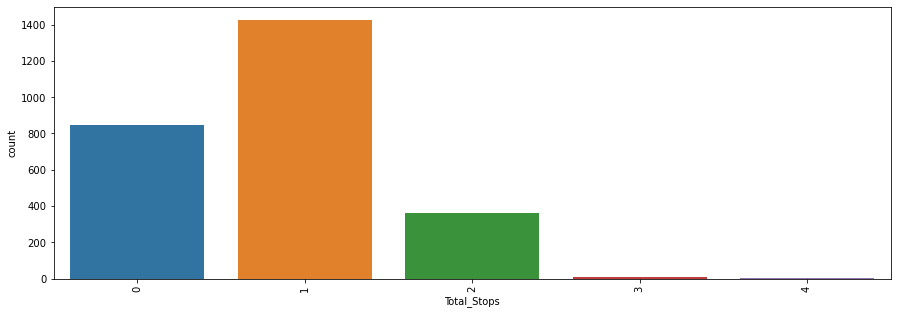

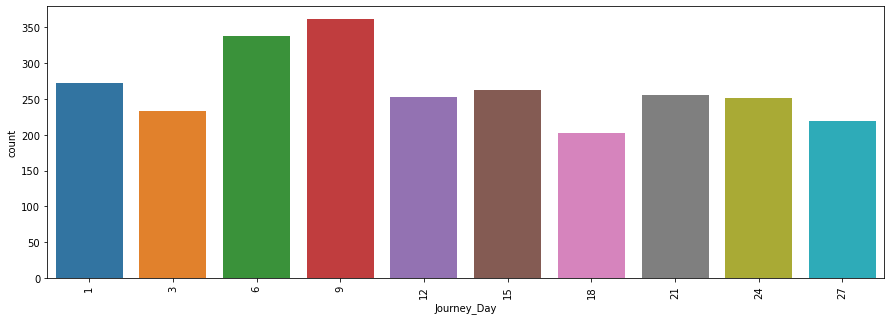

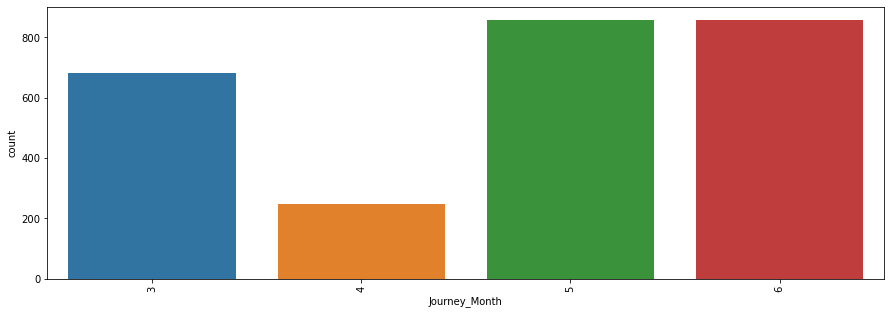

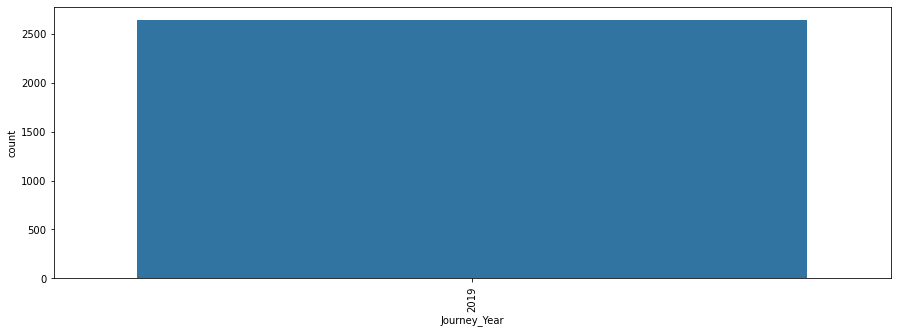

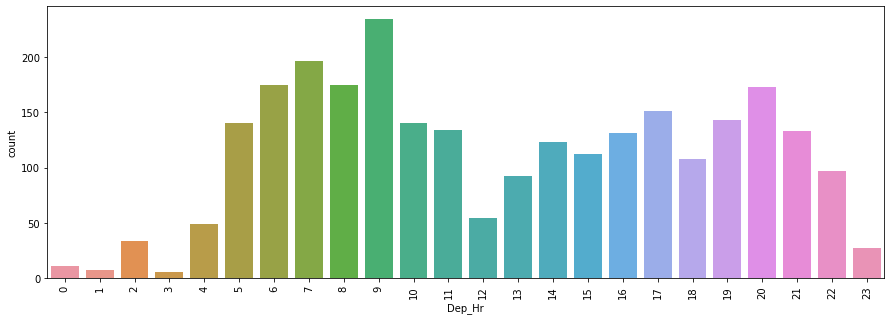

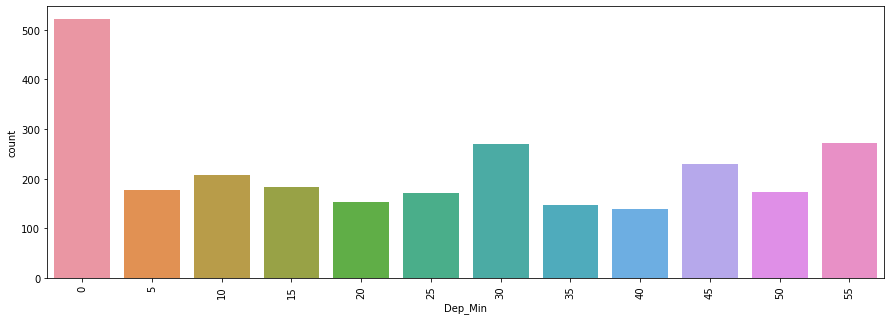

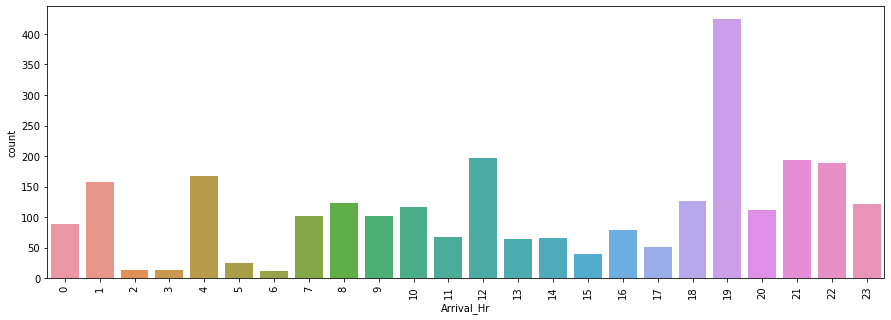

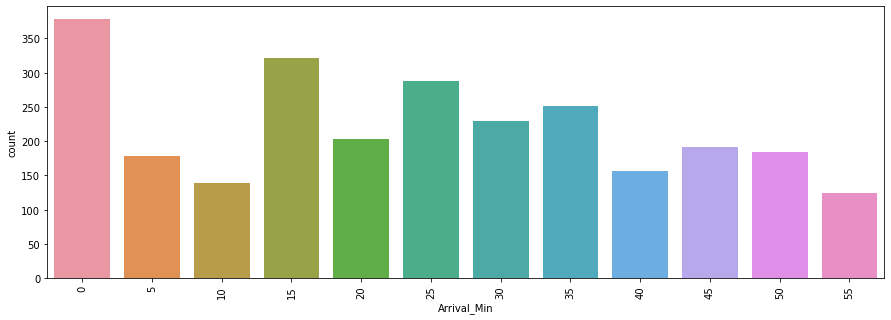

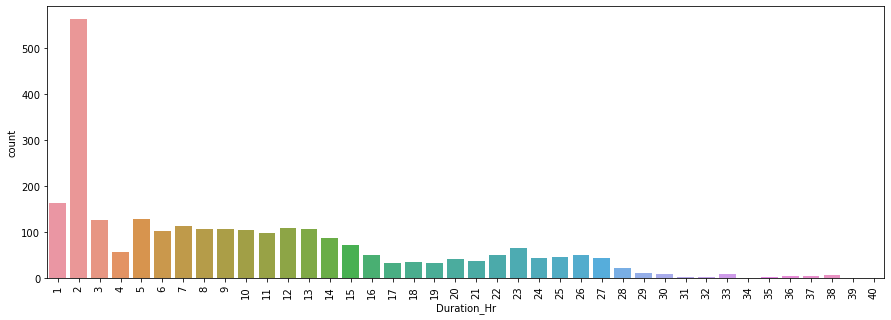

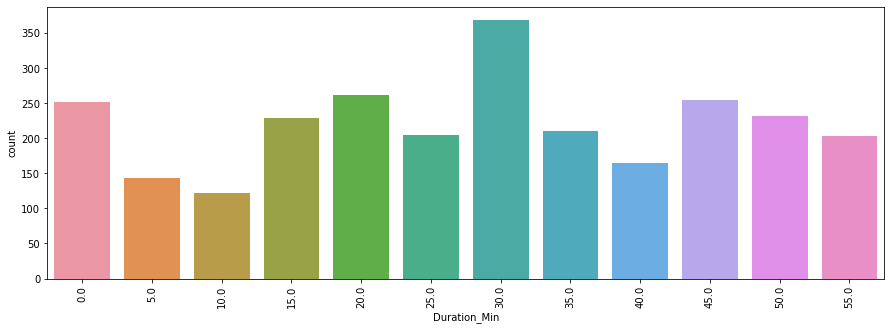

In [87]:
for i in df_test.columns:
    plt.figure(figsize=(15,5))
    sns.countplot(df_test[i])
    plt.xticks(rotation=90)
    plt.show()

In [88]:
#Converting object data type columns to numerical
le = LabelEncoder()
for i in df_test.columns:
    if df_test[i].dtypes==object:
        df_test[i] = le.fit_transform(df_test[i])

In [89]:
#Removing Journey year as it's same for all the rows (we have data only from 2019)
df_test.drop(columns='Journey_Year',axis=1,inplace=True)

In [90]:
df_test.shape

(2645, 12)

In [91]:
#importing the model
price_pred=joblib.load('Flight_price_prediction_rf.obj')

In [93]:
#Predicitng the flight prices
x=price_pred.predict(df_test)

In [95]:
#Inverting the log transformation
x=np.expm1(x)

In [99]:
#creating dataframe of the result
pred_price = pd.DataFrame(x,columns=['Price'])

In [100]:
pred_price

,Price
0,11088.169597
1,4265.365733
2,14203.947609
3,11445.212827
4,3450.405689
...,...
2640,10275.819970
2641,4845.162872
2642,14413.568024
2643,13187.109519


In [105]:
#Saving the result to excel file
pred_price.to_excel('Flight_price_predicted.xlsx',index=False)

In [106]:
#Viewing the results
d=pd.read_excel('Flight_price_predicted.xlsx')

In [107]:
d

,Price
0,11088.169597
1,4265.365733
2,14203.947609
3,11445.212827
4,3450.405689
...,...
2640,10275.819970
2641,4845.162872
2642,14413.568024
2643,13187.109519
